# Comparative Analysis

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

## Load Data

In [13]:
# base learners
dtc_df = pd.read_csv("./results/dtc.csv")
svc_df = pd.read_csv("./results/svc.csv")
lra_df = pd.read_csv("./results/lra.csv")
ann_df = pd.read_csv("./results/ann.csv")

# boosting
# bagging
boost_dtc_df = pd.read_csv("./results/boost_dtc.csv")
boost_svc_df = pd.read_csv("./results/boost_svc.csv")
boost_lra_df = pd.read_csv("./results/boost_lra.csv")
boost_ann_df = pd.read_csv("./results/boost_ann.csv")

# bagging
bag_dtc_df = pd.read_csv("./results/bag_dtc.csv")
bag_svc_df = pd.read_csv("./results/bag_svc.csv")
bag_lra_df = pd.read_csv("./results/bag_lra.csv")
bag_ann_df = pd.read_csv("./results/bag_ann.csv")

# stacking
stk_df = pd.read_csv('./results/stk.csv')
stk_cv_df = pd.read_csv('./results/stk_cv.csv')

In [3]:
def create_df(dfs_dict, metric):
    """Create dataframe with only `metric` columns."""
    col_dict = {}
    for label, df in dfs_dict.items():
        col_dict[label] = df[metric]
    return pd.DataFrame(col_dict)

In [4]:
def pd_boxplot(df, metric, title, save=False):
    """Plot boxplot of the dataframe."""
    df.boxplot(figsize=(6 + int(len(df.columns)/2), 8))
    plt.title(title, fontsize=16)
    plt.xlabel('base learner', fontsize=12)
    plt.ylabel(metric, fontsize=12)
    if save: 
        plt.savefig(f'figures/{title}.png')
    plt.show()

In [5]:
def plot_BCA_mAUC(dfs_dict, title, save=False):
    """Plot routine for BCA and mAUC."""
    BCA_df = create_df(dfs_dict, 'BCA_test')
    mAUC_df = create_df(dfs_dict, 'mAUC_test')
    pd_boxplot(BCA_df, 'BCA', f'{title} (BCA)', save=save)
    pd_boxplot(mAUC_df, 'mAUC', f'{title} (mAUC)', save=save)

## Base Learners

In [6]:
base_dict = {
    'DTC': dtc_df,
    'SVC': svc_df,
    'LRA': lra_df,
    'ANN': ann_df,
}

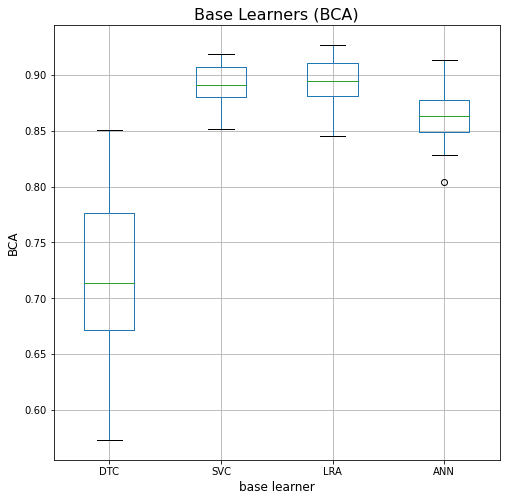

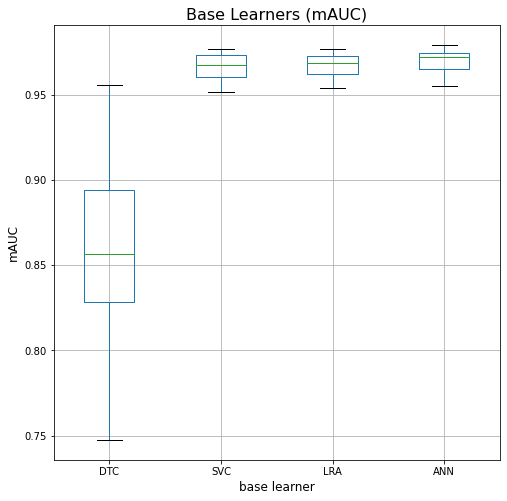

In [7]:
plot_BCA_mAUC(base_dict, 'Base Learners')

## Bagging

In [8]:
bag_dict = {
    'DTC': bag_dtc_df,
    'SVC': bag_svc_df,
    'LRA': bag_lra_df,
    'ANN': bag_ann_df,
}

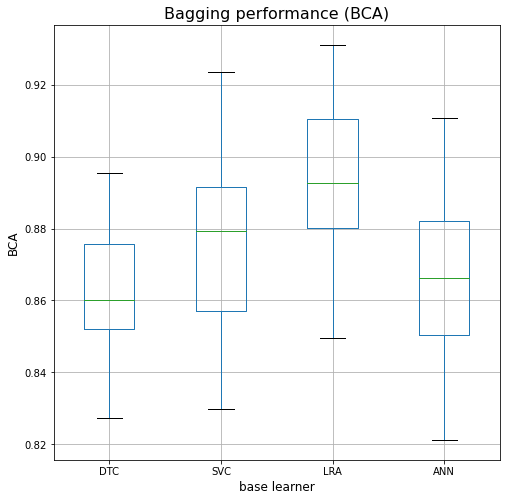

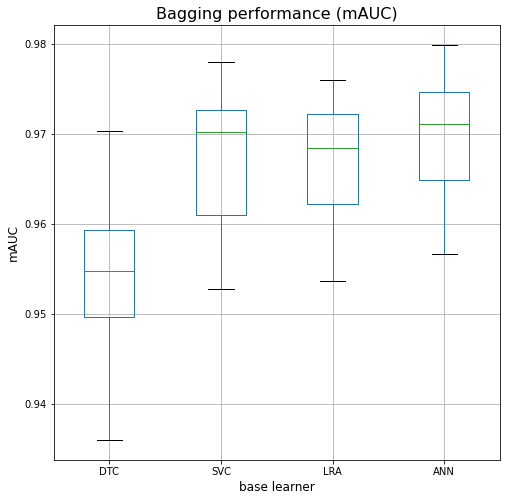

In [9]:
plot_BCA_mAUC(bag_dict, 'Bagging performance')

## Base Learners vs Bagging

In [10]:
base_bag_dict = {
    'DTC': dtc_df,
    'Bagging(DTC)': bag_dtc_df,
    'SVC': svc_df,
    'Bagging(SVC)': bag_svc_df,
    'LRA': lra_df,
    'Bagging(LRA)': bag_lra_df,
    'ANN': ann_df,
    'Bagging(ANN)': bag_ann_df
}

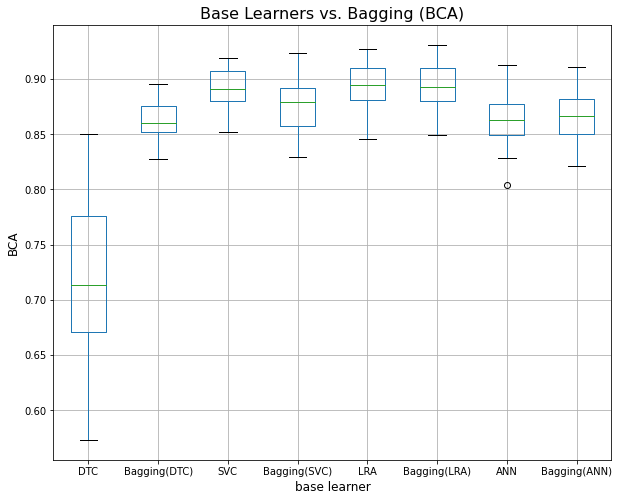

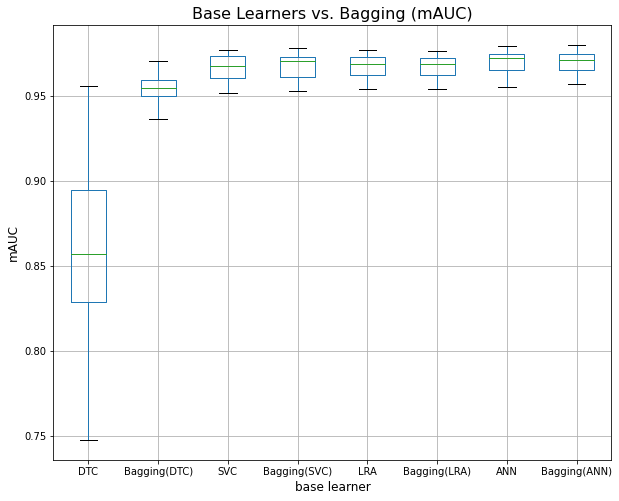

In [11]:
plot_BCA_mAUC(base_bag_dict, 'Base Learners vs. Bagging')

## Base Learners vs Stacking

In [11]:
base_stk_dict = {
    'DTC': dtc_df,
    'SVC': svc_df,
    'LRA': lra_df,
    'ANN': ann_df,
    'Stacking': stk_df,
    'Stacking (CV)': stk_cv_df
}

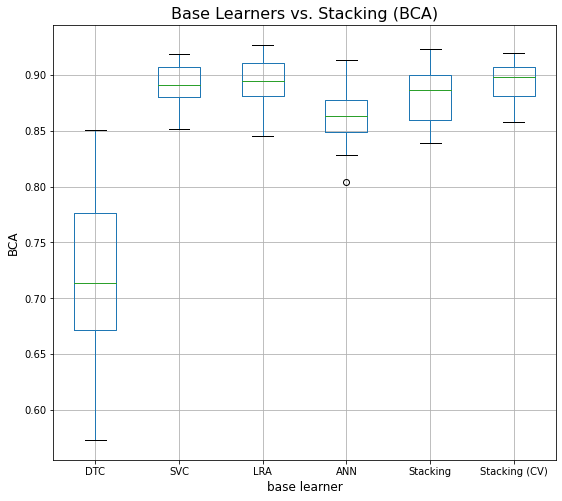

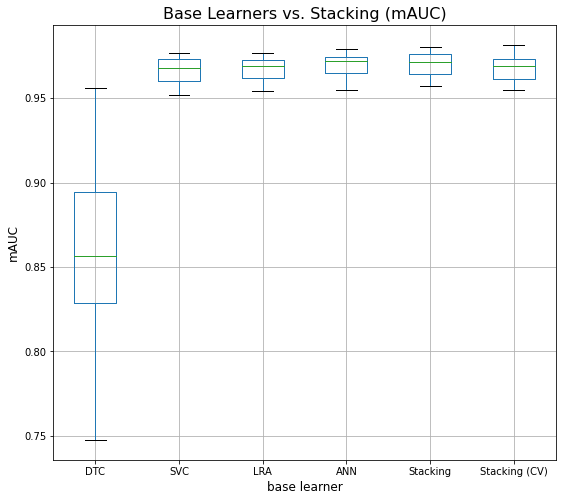

In [13]:
plot_BCA_mAUC(base_stk_dict, 'Base Learners vs. Stacking')

## Base Learners vs Boosting

In [17]:
base_boost_dict = {
    'DTC': dtc_df,
    'Boosting(DTC)': boost_dtc_df,
    'SVC': svc_df,
    'Boosting(SVC)': boost_svc_df,
    'LRA': lra_df,
    'Boosting(LRA)': boost_lra_df,
    'ANN': ann_df,
    'Boosting(ANN)': boost_ann_df
}

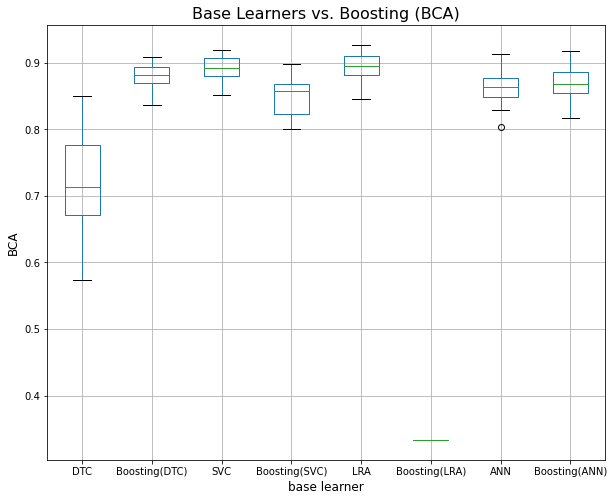

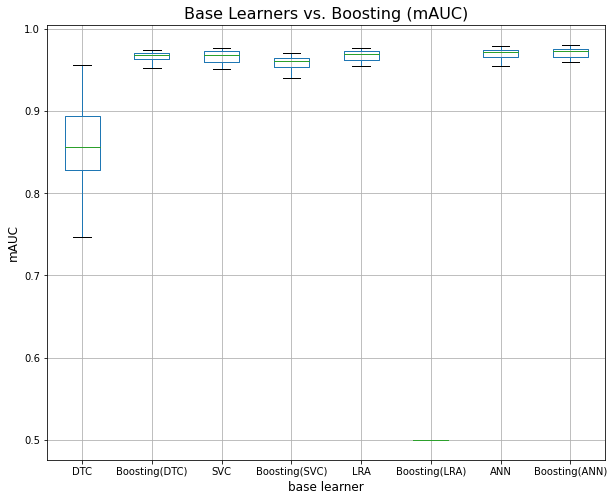

In [18]:
plot_BCA_mAUC(base_boost_dict, 'Base Learners vs. Boosting')

## Bagging vs Stacking vs Boosting

In [21]:
stk_bag_boost_dict = {
    'Bagging(DTC)': bag_dtc_df,
    'Bagging(SVC)': bag_svc_df,
    'Bagging(LRA)': bag_lra_df,
    'Bagging(ANN)': bag_ann_df,
    'Stacking': stk_df,
    'Stacking (CV)': stk_cv_df,
    'Boosting(DTC)': boost_dtc_df,
    'Boosting(SVC)': boost_svc_df,
    'Boosting(LRA)': boost_lra_df,
    'Boosting(ANN)': boost_ann_df
}

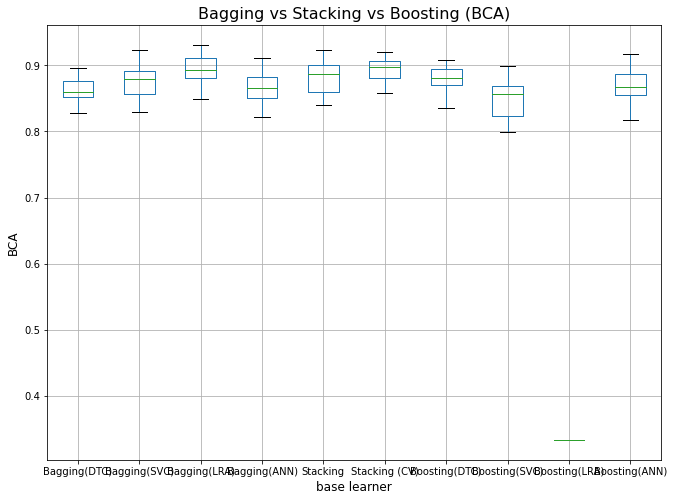

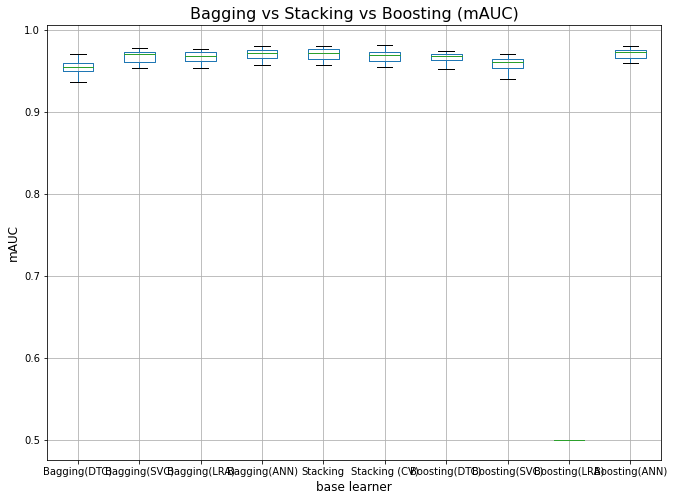

In [22]:
plot_BCA_mAUC(stk_bag_boost_dict, 'Bagging vs Stacking vs Boosting')